## Analysis of All-Transactions House Price Index for California using STL and Prophet
datasource: https://fred.stlouisfed.org/series/CASTHPI

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error


Matplotlib is building the font cache; this may take a moment.
/Users/marcin/EksploracjaDanych/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
DATASET_NAME = "CASTHPI"

<Axes: title={'center': 'All-Transactions House Price Index for California'}, xlabel='time', ylabel='Index value'>

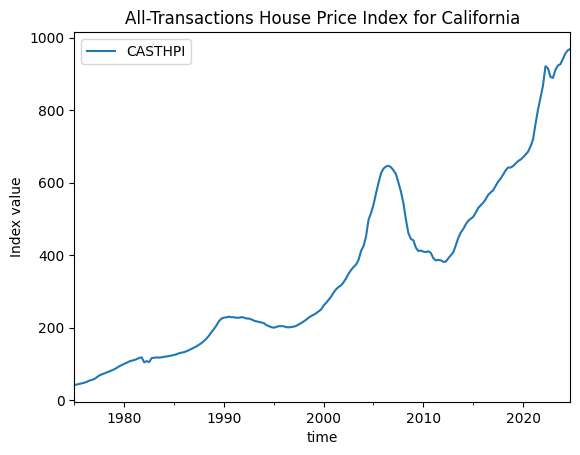

In [16]:
df = pd.read_csv(DATASET_NAME + '.csv')
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)

df.plot(
    xlabel='time',
    ylabel='Index value',
    title='All-Transactions House Price Index for California',
)

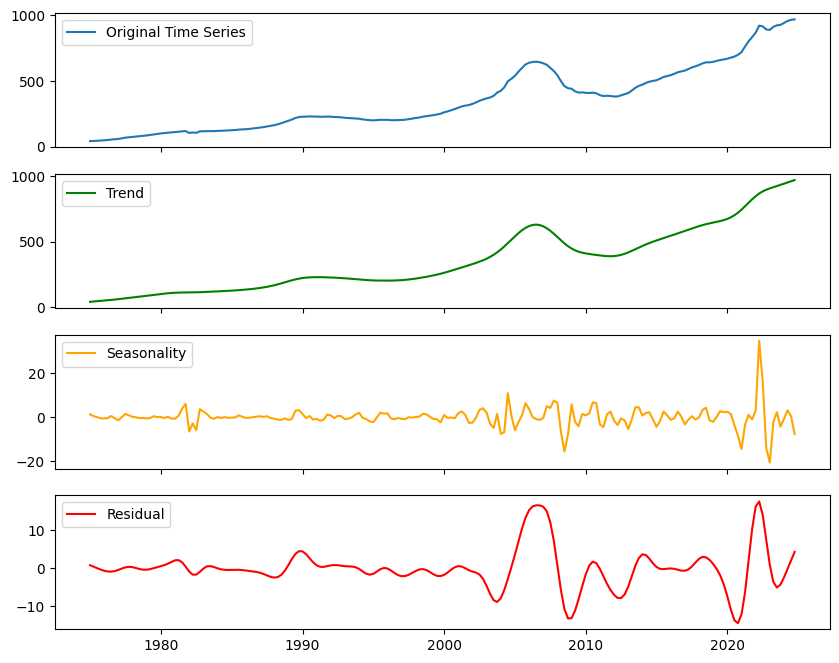

In [4]:
stl = STL(df[DATASET_NAME], seasonal=3)
result = stl.fit()

trend = result.trend
seasonal = result.seasonal
residual = result.resid

fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axes[0].plot(df, label="Original Time Series")
axes[0].legend()
axes[1].plot(trend, label="Trend", color="green")
axes[1].legend()
axes[2].plot(seasonal, label="Seasonality", color="orange")
axes[2].legend()
axes[3].plot(residual, label="Residual", color="red")
axes[3].legend()
plt.show()


In [5]:
df.reset_index(inplace=True)
df.rename(columns={'observation_date': 'ds', DATASET_NAME: 'y'}, inplace=True)
df.head()

,ds,y
0,1975-01-01,41.69
1,1975-04-01,42.77
2,1975-07-01,44.35
3,1975-10-01,45.78
4,1976-01-01,47.82


test size: 40


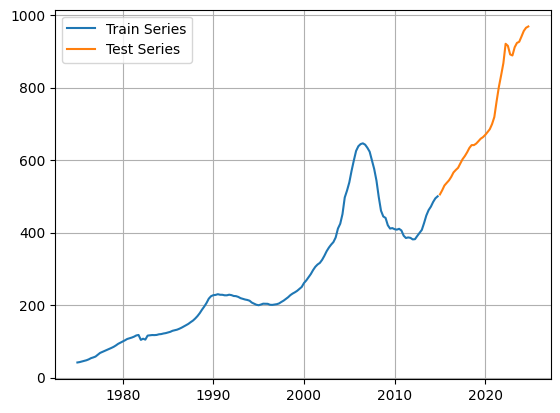

In [6]:
test_size = int(0.2 * len(df))
train_df = df.head(len(df) - test_size)
test_df = df.tail(test_size)
print("test size:", test_size)
plt.plot(train_df['ds'], train_df['y'], label = "Train Series")
plt.plot(test_df['ds'], test_df['y'], label = "Test Series")
plt.legend()
plt.grid()

In [9]:
model = Prophet()
model.fit(train_df)

22:23:58 - cmdstanpy - INFO - Chain [1] start processing
22:24:03 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = model.make_future_dataframe(periods=40, freq='Q') # 10 years ahead (40 quarters)
forecast = model.predict(future)
forecast.tail()

/Users/marcin/EksploracjaDanych/.venv/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
195,2023-09-30,639.807277,542.851969,718.872918,639.018504,640.663469,-11.586274,-11.586274,-11.586274,-11.586274,-11.586274,-11.586274,0.0,0.0,0.0,628.221003
196,2023-12-31,643.026683,536.039204,722.188811,642.205340,643.934662,-12.687038,-12.687038,-12.687038,-12.687038,-12.687038,-12.687038,0.0,0.0,0.0,630.339645
197,2024-03-31,646.211095,541.559020,723.035146,645.351629,647.155626,-12.822351,-12.822351,-12.822351,-12.822351,-12.822351,-12.822351,0.0,0.0,0.0,633.388744
198,2024-06-30,649.395507,546.929379,730.902017,648.498235,650.382136,-12.260875,-12.260875,-12.260875,-12.260875,-12.260875,-12.260875,0.0,0.0,0.0,637.134632
199,2024-09-30,652.614913,549.660720,733.621908,651.684624,653.649906,-11.972452,-11.972452,-11.972452,-11.972452,-11.972452,-11.972452,0.0,0.0,0.0,640.642461


In [12]:
error = mean_absolute_percentage_error(test_df['y'], forecast.tail(test_size)['yhat'])   
print('loss value:', error)

loss value: 0.1742070647256478


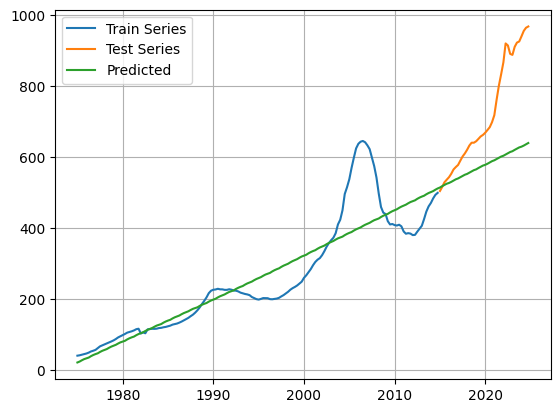

In [13]:
plt.plot(train_df['ds'], train_df['y'], label = "Train Series")
plt.plot(test_df['ds'], test_df['y'], label = "Test Series")
plt.plot(forecast['ds'], forecast['yhat'], label = "Predicted")
plt.legend()
plt.grid()

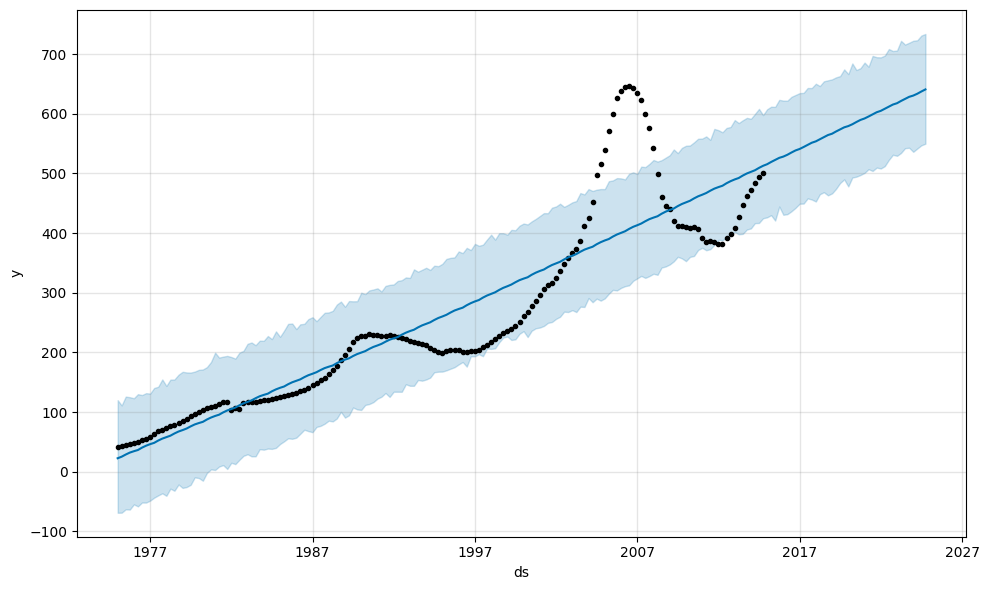

In [14]:
model.plot(forecast)
plt.show()

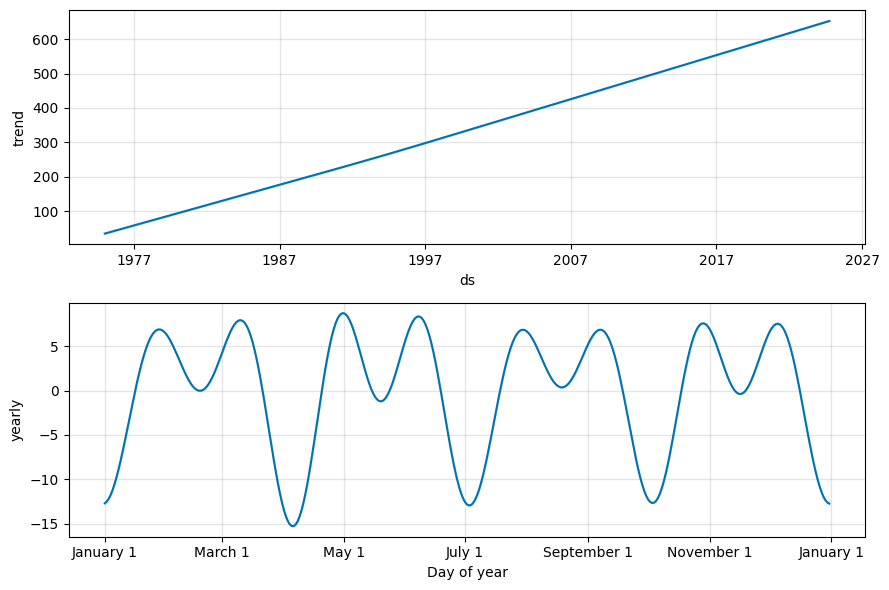

In [15]:
model.plot_components(forecast)
plt.show()
# trend and yearly seasonality